# Introduction

The main goal of the project is to perform a **binary classification task** on the IMDB dataset (form keras.datasets) to determine whether a movie review is positive (1) or negative (0). Additionally, the project focuses on improving a neural network through regularization - along the baseline model, two neural networks of the same architecture were implemented, but only one of them was enhanced with regularization methods. The secondary goal of the project is to show the improvement of the learning processes of the NN with regularization methods.  

In order to achieve the above goals, the following steps were taken:
  1. Preprocessing:
    * Setting a value of the parameter "nwords" (the n most frequent words to be counted in the analysis).
    * Decoding the reviews (only for visual evaluation of the data)
    * Encoding the reviews using the Bag of Words method (for further modeling purposes)
    * Create validation data from training data
  2. Modeling:
    * Implementing a decision tree baseline model
    * Implementing two 8-4-1 architecture DNNs
    * Adding regularization to one of the DNNs
    * Plotting learning curves to monitor the learning process
    * Evaluating the models using test data









# 00 Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers, models, layers
from keras.datasets import imdb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 01 Preprocessing

In [2]:
nwords = 500 # limit of most used words

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=nwords)

print([(o.shape, o.dtype) for o in [train_data, train_labels, test_data, test_labels]])

17464789/17464789 [==============================] - 0s 0us/step
[((25000,), dtype('O')), ((25000,), dtype('int64')), ((25000,), dtype('O')), ((25000,), dtype('int64'))]


In [ ]:
train_data[3] # words are encoded with numbers representing their usage rate

In [4]:
# Decoding the reviews

index = imdb.get_word_index()
inverted_index = dict([(k,v) for (v,k) in index.items()])

def decode(wordList):
  return ' '.join([inverted_index.get(i-3, '?') for i in wordList])

for i in range(10):
  print(train_labels[i], decode(train_data[i]))

1641221/1641221 [==============================] - 0s 0us/step
1 ? this film was just ? ? ? ? story direction ? really ? the part they played and you could just ? being there ? ? is an amazing actor and now the same being director ? father came from the same ? ? as ? so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so ? and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and ? they were just ? children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all
0 ? b

In [5]:
# Encoding the reviews with Bag of Words method

def bowEncode(data, dim=nwords): # bow - Bag of Words
  result = np.zeros((len(data), dim))
  for i, l in enumerate(data):
    for w in l:
      result[i, w] = 1
  return result

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train = bowEncode(train_data)
x_test = bowEncode(test_data)

print(x_train[1], x_train[1].shape)

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
# Creating validation set

trfr_2 = 0.8
ntr_2 = int(trfr_2*x_train.shape[0])

xptrain = x_train[:ntr_2]
yptrain = y_train[:ntr_2]
xval = x_train[ntr_2:]
yval = y_train[ntr_2:]

xptrain.shape, yptrain.shape, xval.shape, yval.shape,

((20000, 500), (20000,), (5000, 500), (5000,))

# 02 Modeling

In [7]:
# Baseline model - Decision Tree

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(xptrain, yptrain)

predicted = dt_classifier.predict(x_test)

accuracy_score(predicted, y_test), confusion_matrix(y_test, predicted)

(0.6806,
 array([[8462, 4038],
        [3947, 8553]]))

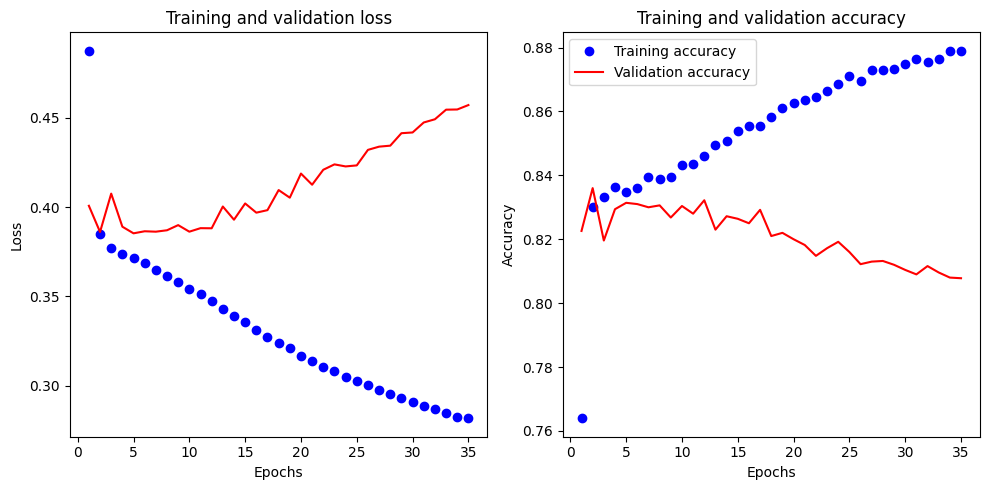

782/782 [==============================] - 2s 3ms/step - loss: 0.4543 - accuracy: 0.8113


[0.45430129766464233, 0.8112800121307373]

In [8]:
# DNN (no regularization)

model1 = models.Sequential([
    layers.Dense(8, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    ])

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(xptrain, yptrain, epochs=35, batch_size=64, validation_data=(xval, yval), verbose=0)

history_dict1 = history1.history
loss1 = history_dict1['loss']
val_loss1 = history_dict1['val_loss']
acc1 = history_dict1['accuracy']
val_acc1 = history_dict1['val_accuracy']
epochs = range(1, len(loss1)+1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(epochs, loss1, 'bo', label='Training loss')
ax[0].plot(epochs, val_loss1, 'r', label='Validation loss')
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, acc1, 'bo', label='Training accuracy')
ax[1].plot(epochs, val_acc1, 'r', label='Validation accuracy')
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.legend()
plt.show()

model1.evaluate(x_test, y_test)

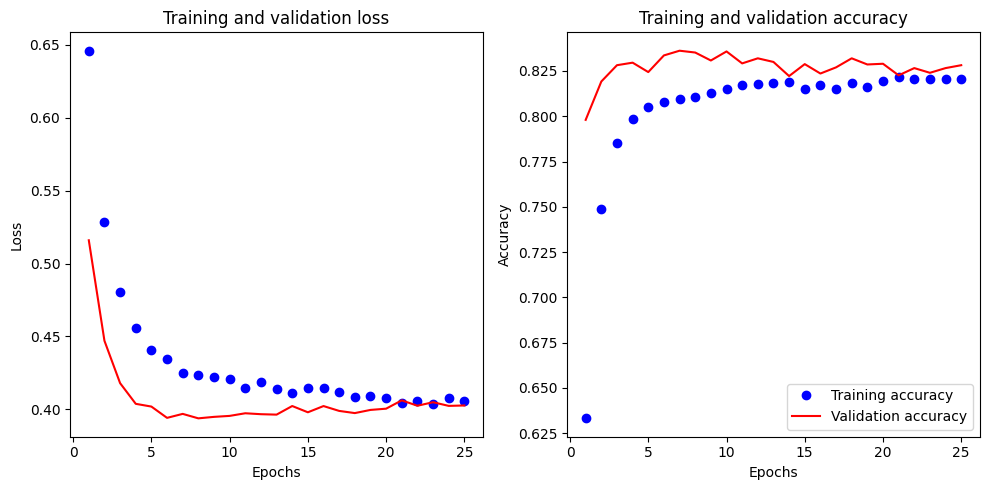

782/782 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8261


[0.39929866790771484, 0.8260800242424011]

In [9]:
# NN (with regularization)

model2 =keras.Sequential([
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(4, kernel_regularizer=regularizers.l2(0.004), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(xptrain, yptrain, epochs=25, batch_size=64, validation_data=(xval, yval), verbose=0)

history_dict2 = history2.history
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']
acc2 = history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
epochs = range(1, len(loss2)+1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(epochs, loss2, 'bo', label='Training loss')
ax[0].plot(epochs, val_loss2, 'r', label='Validation loss')
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs, acc2, 'bo', label='Training accuracy')
ax[1].plot(epochs, val_acc2, 'r', label='Validation accuracy')
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

# The results and conclusions

To assess the performance of the models, an accuracy metric has been chosen. The models performed as follows:
* Baseline model: ~68%
* DNN: ~81%
* DNN with regularization: ~82%

Since the DNN models achieved significantly better results than the baseline model (scoring acceptable >80% accuracy), we can say that the main goal of this project has been achieved.

By visualizing the learning curves of the DNN models, we can see that the DNN without regularization is clearly **overfitted**. Although both DNNs produce very similar results, the regularization used in the latter DNN ensured a healthier learning process and made the model more reliable.